# Week Three - Part 2 - Assignment Data Sets

# DATA 620 
### 6/19/21
### Authors : John Mazon, Leticia Cancel, Bharani Nittala

# Import libraries

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite

# Description

Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

    Brief Description. Small “musty” datasets like that from this 1941 study have proven very valuable in testing and 
    comparing new network algorithms.
    Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html

What can you infer about the relationships between (1) the women, and (2) the social events?  

+ Load network and get basic information of graph

In [38]:
G = nx.davis_southern_women_graph()
women=G.graph["top"]
clubs=G.graph["bottom"]

print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 89
Average degree:   5.5625


+ Print Biadjaceny matrix

In [39]:
print(bipartite.biadjacency_matrix(G, women, clubs))

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


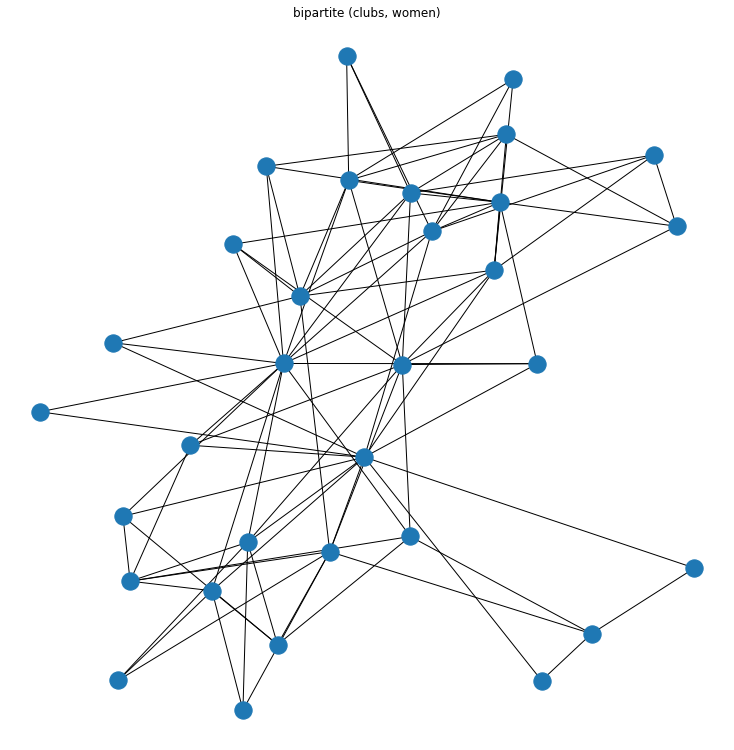

In [40]:
# Draw graph
plt.figure(figsize=(10,10))
nx.draw(G)
plt.title('bipartite (clubs, women)')
plt.show()

In [41]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")


#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


In [42]:
# project bipartite graph onto women nodes keeping number of co-occurence
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='edges')} {w}")


#Friend meetings, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


In [43]:
# Print Names of the women
print('Name of the woman:')
for name in women:
    print(name)
print()
# print names of the clubs
print('Name of the clubs:')
for name in clubs:
    print(name)


Name of the woman:
Evelyn Jefferson
Laura Mandeville
Theresa Anderson
Brenda Rogers
Charlotte McDowd
Frances Anderson
Eleanor Nye
Pearl Oglethorpe
Ruth DeSand
Verne Sanderson
Myra Liddel
Katherina Rogers
Sylvia Avondale
Nora Fayette
Helen Lloyd
Dorothy Murchison
Olivia Carleton
Flora Price

Name of the clubs:
E1
E2
E3
E4
E5
E6
E7
E8
E9
E10
E11
E12
E13
E14


In [67]:
import pandas as pd
# get matrix for relationships between event and women
df=nx.to_pandas_adjacency(G, dtype=int)
df=df.iloc[:18,18:]

df.style

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14
Evelyn Jefferson,1,1,1,1,1,1,0,1,1,0,0,0,0,0
Laura Mandeville,1,1,1,0,1,1,1,1,0,0,0,0,0,0
Theresa Anderson,0,1,1,1,1,1,1,1,1,0,0,0,0,0
Brenda Rogers,1,0,1,1,1,1,1,1,0,0,0,0,0,0
Charlotte McDowd,0,0,1,1,1,0,1,0,0,0,0,0,0,0
Frances Anderson,0,0,1,0,1,1,0,1,0,0,0,0,0,0
Eleanor Nye,0,0,0,0,1,1,1,1,0,0,0,0,0,0
Pearl Oglethorpe,0,0,0,0,0,1,0,1,1,0,0,0,0,0
Ruth DeSand,0,0,0,0,1,0,1,1,1,0,0,0,0,0
Verne Sanderson,0,0,0,0,0,0,1,1,1,0,0,1,0,0


In [76]:
# Get information of each woman and events
IF=[list() for i in range(len(women))]
print(len(IF))
for club in clubs:
    for i in range(len(women)):
        if(df[club][i]==1):
            IF[i].append(club)
    

18


In [86]:
# Display information of each woman and events
for index in range(len(women)):
    string=', '.join([event for event in IF[index]])
    print(women[index] + ' at Event: \t' + string)

Evelyn Jefferson at Event: 	E1, E2, E3, E4, E5, E6, E8, E9
Laura Mandeville at Event: 	E1, E2, E3, E5, E6, E7, E8
Theresa Anderson at Event: 	E2, E3, E4, E5, E6, E7, E8, E9
Brenda Rogers at Event: 	E1, E3, E4, E5, E6, E7, E8
Charlotte McDowd at Event: 	E3, E4, E5, E7
Frances Anderson at Event: 	E3, E5, E6, E8
Eleanor Nye at Event: 	E5, E6, E7, E8
Pearl Oglethorpe at Event: 	E6, E8, E9
Ruth DeSand at Event: 	E5, E7, E8, E9
Verne Sanderson at Event: 	E7, E8, E9, E12
Myra Liddel at Event: 	E8, E9, E10, E12
Katherina Rogers at Event: 	E8, E9, E10, E12, E13, E14
Sylvia Avondale at Event: 	E7, E8, E9, E10, E12, E13, E14
Nora Fayette at Event: 	E6, E7, E9, E10, E11, E12, E13, E14
Helen Lloyd at Event: 	E7, E8, E10, E11, E12
Dorothy Murchison at Event: 	E8, E9
Olivia Carleton at Event: 	E9, E11
Flora Price at Event: 	E9, E11
